# Task - 3



## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below
dataset= pd.read_csv(r'C:\Users\RAJAT SAHU\Data_Science\Project\BasicPandasCLeanning\Task - 1 (Basic Pandas and Data Cleaning)\train.csv')
dataset.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe
dataset.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## 2. Cleaning the Data

In [5]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type
dataset.isnull().sum()
#Health Indicator
dataset['Health Indicator'].value_counts()    #categorical data means we have to replce Null values to the Mode values or frq
dataset['Health Indicator'].fillna('X1',inplace=True)

#Holding_Policy_Duration
print(dataset['Holding_Policy_Duration'].value_counts()) #categorical data means we have to replce Null values to the Mode values or frq
dataset['Holding_Policy_Duration'].replace('14+','15',inplace=True)
dataset['Holding_Policy_Duration'].fillna('15',inplace=True)

#Holding_Policy_Type
dataset['Holding_Policy_Type'].value_counts()
dataset['Holding_Policy_Type'].fillna(3.0,inplace=True)

14+    898
1      867
2      790
3      696
4      530
5      461
6      374
7      320
8      254
9      205
10     166
12     104
13     103
14      89
11      89
Name: Holding_Policy_Duration, dtype: int64


In [6]:
dataset.isnull().sum()

Unnamed: 0                 0
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [7]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No
dataset.select_dtypes(include=['object'])

# conclusion : we have a only one column is in Yer/No formate

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Owned,Individual,No,X1,15
1,C3,Owned,Individual,No,X6,10
2,C1,Rented,Individual,No,X1,3
3,C26,Rented,Individual,No,X1,1
4,C2,Owned,Joint,Yes,X1,15
...,...,...,...,...,...,...
9995,C3,Owned,Joint,Yes,X5,15
9996,C5,Rented,Individual,No,X1,6
9997,C1,Owned,Individual,No,X1,8
9998,C1,Rented,Individual,No,X5,15


In [8]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0

# Query
dataset['Is_Spouse'] = dataset['Is_Spouse'].apply(lambda x:1 if x=='Yes' else 0)
dataset['Is_Spouse'].dtypes

dtype('int64')

In [9]:
# Now again having a look at all those columns to see if everything went well
dataset.select_dtypes(include=['object'])

,City_Code,Accomodation_Type,Reco_Insurance_Type,Health Indicator,Holding_Policy_Duration
0,C3,Owned,Individual,X1,15
1,C3,Owned,Individual,X6,10
2,C1,Rented,Individual,X1,3
3,C26,Rented,Individual,X1,1
4,C2,Owned,Joint,X1,15
...,...,...,...,...,...
9995,C3,Owned,Joint,X5,15
9996,C5,Rented,Individual,X1,6
9997,C1,Owned,Individual,X1,8
9998,C1,Rented,Individual,X5,15


In [10]:
# Observe that all those columns are now converted from Object to Int64

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  object 
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [11]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories
dataset.select_dtypes(include=['object'])

,City_Code,Accomodation_Type,Reco_Insurance_Type,Health Indicator,Holding_Policy_Duration
0,C3,Owned,Individual,X1,15
1,C3,Owned,Individual,X6,10
2,C1,Rented,Individual,X1,3
3,C26,Rented,Individual,X1,1
4,C2,Owned,Joint,X1,15
...,...,...,...,...,...
9995,C3,Owned,Joint,X5,15
9996,C5,Rented,Individual,X1,6
9997,C1,Owned,Individual,X1,8
9998,C1,Rented,Individual,X5,15


In [12]:
# You can also do this to separate Object columns
dataset.select_dtypes(include=['object']).columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')

In [13]:
# Lets just try to see what is happening Response. Check the output.
dataset['Response'].value_counts()

## Observation : Dataset Responce is ~skewed

0    7541
1    2459
Name: Response, dtype: int64

In [14]:
# Dropping unknown column
print(dataset.columns)
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

# Write the code here to drop unknown column and check dataframe shape
print('After Remove Unwanted columns',dataset.columns)

Index(['Unnamed: 0', 'ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')
After Remove Unwanted columns Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')


In [15]:
# Getting all the Object Dtypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   City_Code                10000 non-null  object 
 2   Region_Code              10000 non-null  int64  
 3   Accomodation_Type        10000 non-null  object 
 4   Reco_Insurance_Type      10000 non-null  object 
 5   Upper_Age                10000 non-null  int64  
 6   Lower_Age                10000 non-null  int64  
 7   Is_Spouse                10000 non-null  int64  
 8   Health Indicator         10000 non-null  object 
 9   Holding_Policy_Duration  10000 non-null  object 
 10  Holding_Policy_Type      10000 non-null  float64
 11  Reco_Policy_Cat          10000 non-null  int64  
 12  Reco_Policy_Premium      10000 non-null  float64
 13  Response                 10000 non-null  int64  
dtypes: float64(2), int64(7)

In [16]:
cat_col = dataset.select_dtypes(include=['object']).columns

for i in cat_col:
    print('Column Name : ',str(i))
    print('Number of unique values in the Categorical Dataset : ',dataset[str(i)].unique())
    print('\n')

Column Name :  City_Code
Number of unique values in the Categorical Dataset :  ['C3' 'C1' 'C26' 'C2' 'C17' 'C4' 'C16' 'C9' 'C23' 'C21' 'C6' 'C7' 'C11'
 'C22' 'C15' 'C13' 'C8' 'C35' 'C29' 'C33' 'C10' 'C12' 'C19' 'C5' 'C18'
 'C14' 'C24' 'C27' 'C20' 'C34' 'C36' 'C25' 'C28' 'C32' 'C30' 'C31']


Column Name :  Accomodation_Type
Number of unique values in the Categorical Dataset :  ['Owned' 'Rented']


Column Name :  Reco_Insurance_Type
Number of unique values in the Categorical Dataset :  ['Individual' 'Joint']


Column Name :  Health Indicator
Number of unique values in the Categorical Dataset :  ['X1' 'X6' 'X4' 'X2' 'X3' 'X5' 'X8' 'X7' 'X9']


Column Name :  Holding_Policy_Duration
Number of unique values in the Categorical Dataset :  ['15' '10' '3' '1' '7' '13' '9' '8' '14' '2' '4' '5' '11' '6' '12']




In [17]:
#  create Lables the categorical features
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
for i in cat_col:
    dataset[str(i)] = lable_encoder.fit_transform(dataset[str(i)])

In [18]:
cat_col = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Health Indicator']
dataset[cat_col].dtypes

City_Code              int32
Accomodation_Type      int32
Reco_Insurance_Type    int32
Health Indicator       int32
dtype: object

In [19]:
dataset['City_Code'].to_numpy()

array([22, 22,  0, ...,  0,  0, 33])

In [20]:
dataset[cat_col]

,City_Code,Accomodation_Type,Reco_Insurance_Type,Health Indicator
0,22,0,0,0
1,22,0,0,5
2,0,1,0,0
3,18,1,0,0
4,11,0,1,0
...,...,...,...,...
9995,22,0,1,4
9996,31,1,0,0
9997,0,0,0,0
9998,0,1,0,4


In [21]:
# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
cat_col = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Health Indicator']
for  i in cat_col:
    print('Numpy Array Formate columns "'+str(i)+'" : ', dataset[str(i)].to_numpy())
# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
from sklearn.preprocessing import OneHotEncoder
one_coding = OneHotEncoder()
df = pd.get_dummies(dataset,columns=['Accomodation_Type','Reco_Insurance_Type','Health Indicator'])
df.columns
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

# ______________________________
# ______________________________


Numpy Array Formate columns "City_Code" :  [22 22  0 ...  0  0 33]
Numpy Array Formate columns "Accomodation_Type" :  [0 0 1 ... 0 1 0]
Numpy Array Formate columns "Reco_Insurance_Type" :  [0 0 0 ... 0 0 1]
Numpy Array Formate columns "Health Indicator" :  [0 5 0 ... 0 4 1]


Index(['ID', 'City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'Accomodation_Type_0',
       'Accomodation_Type_1', 'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1',
       'Health Indicator_0', 'Health Indicator_1', 'Health Indicator_2',
       'Health Indicator_3', 'Health Indicator_4', 'Health Indicator_5',
       'Health Indicator_6', 'Health Indicator_7', 'Health Indicator_8'],
      dtype='object')

In [22]:
# Concatinating the original data frame and onehot encoded dataframe
df.head(2)

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,...,Reco_Insurance_Type_1,Health Indicator_0,Health Indicator_1,Health Indicator_2,Health Indicator_3,Health Indicator_4,Health Indicator_5,Health Indicator_6,Health Indicator_7,Health Indicator_8
0,27386,22,64,36,36,0,6,2.0,16,13320.0,...,0,1,0,0,0,0,0,0,0,0
1,33500,22,2955,66,66,0,1,1.0,19,16152.0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'Accomodation_Type_0',
       'Accomodation_Type_1', 'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1',
       'Health Indicator_0', 'Health Indicator_1', 'Health Indicator_2',
       'Health Indicator_3', 'Health Indicator_4', 'Health Indicator_5',
       'Health Indicator_6', 'Health Indicator_7', 'Health Indicator_8'],
      dtype='object')

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [24]:
#Observe that 26.5% datapoints belong to one class rest all belongs to other class.
print('Response\n',df['Response'].value_counts(normalize=True)*100,'%')

Response
 0    75.41
1    24.59
Name: Response, dtype: float64 %


## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [25]:
df.drop('ID',axis=1,inplace=True)

In [26]:
df = df[['City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium','Accomodation_Type_0',
       'Accomodation_Type_1', 'Reco_Insurance_Type_0', 'Reco_Insurance_Type_1',
       'Health Indicator_0', 'Health Indicator_1', 'Health Indicator_2',
       'Health Indicator_3', 'Health Indicator_4', 'Health Indicator_5',
       'Health Indicator_6', 'Health Indicator_7', 'Health Indicator_8', 'Response']]

In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=21)

In [29]:
X_test.shape

(2000, 22)

In [30]:
print(X_train.shape)
print(y_train.shape)

(8000, 22)
(8000,)


In [31]:
#inbalancing "Dependent Festures" Data :  In percentage
y_train.value_counts(normalize=True)*100

0    75.575
1    24.425
Name: Response, dtype: float64

In [32]:
### Inabalance Independent Veriable : 
from imblearn.over_sampling import SMOTE
sm = SMOTE()    #SMOTE : Synthetic minority oversampling technique (inbalance Data Handling)
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

In [33]:
print(X_train_smote.shape)

(12092, 22)


In [34]:
print(y_train_smote.shape)

(12092,)


In [35]:
# After balancing Independent Veriable
y_train_smote.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Response, dtype: float64

## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

In [36]:
# Warining 
import warnings
warnings.filterwarnings('ignore')

# Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
#Support Vector Matchine
from sklearn import svm
#KNN mathod
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# Graident Boosting
from sklearn.ensemble import GradientBoostingClassifier
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier

In [37]:
# Project Summary 
ModelSummary = {}
k = 0

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)
y_pred = logreg.predict(X_test)
print('Logistic Regression Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print('Logistic Regression Model Precision : ', precision_score(y_pred,y_test)*100,'%')
print('Logistic Regression Model Recall : ', recall_score(y_pred,y_test)*100,'%')
print('Logistic Regression Model F1 score : ', f1_score(y_pred,y_test)*100,'%')
ModelName = 'Base_Logistic_Regression'
Acc = accuracy_score(y_pred,y_test)*100
pres = precision_score(y_pred,y_test)*100
recal = recall_score(y_pred,y_test)*100
f1score = f1_score(y_pred,y_test)*100

Logistic Regression Model Accuracy :  52.5 %
Logistic Regression Model Precision :  59.8019801980198 %
Logistic Regression Model Recall :  28.789323164918972 %
Logistic Regression Model F1 score :  38.86743886743887 %


Logistic Regression Model Accuracy :  52.5 %
[[748 203]
 [747 302]]
              precision    recall  f1-score   support

           0       0.50      0.79      0.61       951
           1       0.60      0.29      0.39      1049

    accuracy                           0.53      2000
   macro avg       0.55      0.54      0.50      2000
weighted avg       0.55      0.53      0.49      2000



{0: {'ModelName': 'Base_Logistic_Regression_classification',
  'ModeAccuracy': 0.525,
  'Precision': 0.598019801980198,
  'Recall': 0.28789323164918973,
  'f1score': 0.3886743886743887}}

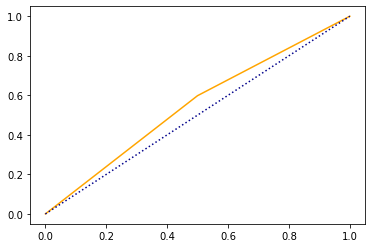

In [39]:
# Base Model : Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)
y_pred = logreg.predict(X_test)
print('Logistic Regression Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')

print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

#ProjectSummary
ModelName = 'Base_Logistic_Regression_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1

#ROC curve
from sklearn.metrics import roc_curve
fpr , tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')

ModelSummary

KNeighborsClassifier Model Accuracy :  0.534
[[862 299]
 [633 206]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1161
           1       0.41      0.25      0.31       839

    accuracy                           0.53      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.51      0.53      0.51      2000

{0: {'ModelName': 'Base_Logistic_Regression_classification', 'ModeAccuracy': 0.525, 'Precision': 0.598019801980198, 'Recall': 0.28789323164918973, 'f1score': 0.3886743886743887}, 1: {'ModelName': 'Base_KNeighbors_classification', 'ModeAccuracy': 0.534, 'Precision': 0.4079207920792079, 'Recall': 0.24553039332538737, 'f1score': 0.30654761904761907}}


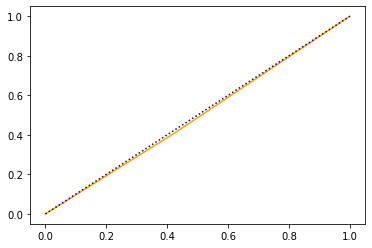

In [40]:
# KNN claddsifiction
knn = KNeighborsClassifier()
knn.fit(X_train_smote,y_train_smote)
y_pred = knn.predict(X_test)
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

#ProjectSummary
ModelName = 'Base_KNeighbors_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1
print(ModelSummary)

#ROC curve
from sklearn.metrics import roc_curve
fpr , tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')

DecisionTreeClassifier Model Accuracy :  0.627
{0: {'ModelName': 'Base_Logistic_Regression_classification', 'ModeAccuracy': 0.525, 'Precision': 0.598019801980198, 'Recall': 0.28789323164918973, 'f1score': 0.3886743886743887}, 1: {'ModelName': 'Base_KNeighbors_classification', 'ModeAccuracy': 0.534, 'Precision': 0.4079207920792079, 'Recall': 0.24553039332538737, 'f1score': 0.30654761904761907}, 2: {'ModelName': 'Base_DecisionTree_classification', 'ModeAccuracy': 0.627, 'Precision': 0.31485148514851485, 'Recall': 0.2844364937388193, 'f1score': 0.29887218045112773}}


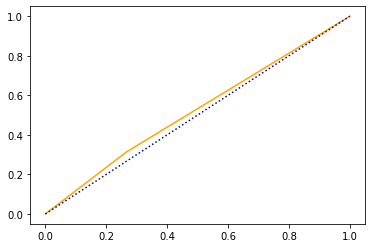

In [41]:
#Decision claddsifiction
dt = DecisionTreeClassifier()
dt.fit(X_train_smote,y_train_smote)
y_pred = dt.predict(X_test)
print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred,y_test))
confusion_matrix(y_pred,y_test)


#ProjectSummary
ModelName = 'Base_DecisionTree_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1
print(ModelSummary)

#ROC curve
from sklearn.metrics import roc_curve
fpr , tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')

RandomForestClassifier Model Accuracy :  0.7285
{0: {'ModelName': 'Base_Logistic_Regression_classification', 'ModeAccuracy': 0.525, 'Precision': 0.598019801980198, 'Recall': 0.28789323164918973, 'f1score': 0.3886743886743887}, 1: {'ModelName': 'Base_KNeighbors_classification', 'ModeAccuracy': 0.534, 'Precision': 0.4079207920792079, 'Recall': 0.24553039332538737, 'f1score': 0.30654761904761907}, 2: {'ModelName': 'Base_DecisionTree_classification', 'ModeAccuracy': 0.627, 'Precision': 0.31485148514851485, 'Recall': 0.2844364937388193, 'f1score': 0.29887218045112773}, 3: {'ModelName': 'Base_RandomForest_classification', 'ModeAccuracy': 0.7285, 'Precision': 0.09504950495049505, 'Recall': 0.3582089552238806, 'f1score': 0.15023474178403756}}


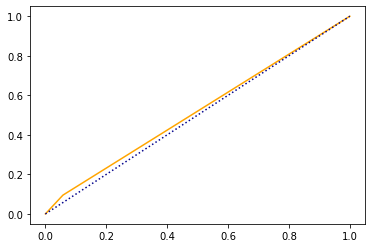

In [42]:
#Random Forest claddsifiction
rnd = RandomForestClassifier()
rnd.fit(X_train_smote,y_train_smote)
y_pred = rnd.predict(X_test)
print('RandomForestClassifier Model Accuracy : ', accuracy_score(y_pred,y_test))
confusion_matrix(y_pred,y_test)


#ProjectSummary
ModelName = 'Base_RandomForest_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1
print(ModelSummary)

#ROC curve
from sklearn.metrics import roc_curve
fpr , tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')

GradientBoostingClassifier Model Accuracy :  0.742
{0: {'ModelName': 'Base_Logistic_Regression_classification', 'ModeAccuracy': 0.525, 'Precision': 0.598019801980198, 'Recall': 0.28789323164918973, 'f1score': 0.3886743886743887}, 1: {'ModelName': 'Base_KNeighbors_classification', 'ModeAccuracy': 0.534, 'Precision': 0.4079207920792079, 'Recall': 0.24553039332538737, 'f1score': 0.30654761904761907}, 2: {'ModelName': 'Base_DecisionTree_classification', 'ModeAccuracy': 0.627, 'Precision': 0.31485148514851485, 'Recall': 0.2844364937388193, 'f1score': 0.29887218045112773}, 3: {'ModelName': 'Base_RandomForest_classification', 'ModeAccuracy': 0.7285, 'Precision': 0.09504950495049505, 'Recall': 0.3582089552238806, 'f1score': 0.15023474178403756}, 4: {'ModelName': 'Base_GradientBoosting_classification', 'ModeAccuracy': 0.742, 'Precision': 0.011881188118811881, 'Recall': 0.2608695652173913, 'f1score': 0.022727272727272728}}


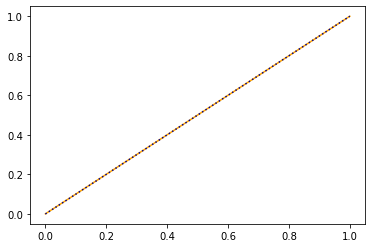

In [43]:
#Gradient Boosting claddsifiction
grb = GradientBoostingClassifier()
grb.fit(X_train_smote,y_train_smote)
y_pred = grb.predict(X_test)
print('GradientBoostingClassifier Model Accuracy : ', accuracy_score(y_pred,y_test))
confusion_matrix(y_pred,y_test)

#ProjectSummary
ModelName = 'Base_GradientBoosting_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1
print(ModelSummary)

#ROC curve
from sklearn.metrics import roc_curve
fpr , tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')

AdaBoostClassifier Model Accuracy :  73.75 %
{0: {'ModelName': 'Base_Logistic_Regression_classification', 'ModeAccuracy': 0.525, 'Precision': 0.598019801980198, 'Recall': 0.28789323164918973, 'f1score': 0.3886743886743887}, 1: {'ModelName': 'Base_KNeighbors_classification', 'ModeAccuracy': 0.534, 'Precision': 0.4079207920792079, 'Recall': 0.24553039332538737, 'f1score': 0.30654761904761907}, 2: {'ModelName': 'Base_DecisionTree_classification', 'ModeAccuracy': 0.627, 'Precision': 0.31485148514851485, 'Recall': 0.2844364937388193, 'f1score': 0.29887218045112773}, 3: {'ModelName': 'Base_RandomForest_classification', 'ModeAccuracy': 0.7285, 'Precision': 0.09504950495049505, 'Recall': 0.3582089552238806, 'f1score': 0.15023474178403756}, 4: {'ModelName': 'Base_GradientBoosting_classification', 'ModeAccuracy': 0.742, 'Precision': 0.011881188118811881, 'Recall': 0.2608695652173913, 'f1score': 0.022727272727272728}, 5: {'ModelName': 'Base_AdaBoosting_classification', 'ModeAccuracy': 0.7375, 'Pr

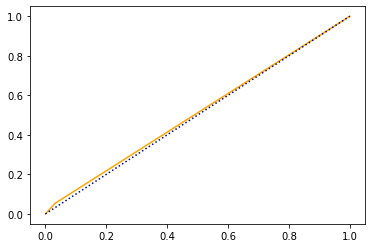

In [44]:
#Ada Boosting claddsifiction
adb = AdaBoostClassifier()
adb.fit(X_train_smote,y_train_smote)
y_pred = adb.predict(X_test)
print('AdaBoostClassifier Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
confusion_matrix(y_pred,y_test)


#ProjectSummary
ModelName = 'Base_AdaBoosting_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1
print(ModelSummary)





#ROC curve
from sklearn.metrics import roc_curve
fpr , tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')

In [97]:
ModelName,ModeAccuracy,Precision,Recall,f1score = [],[],[],[],[]
import json
sorted_json_data = json.dumps(ModelSummary, sort_keys=True)
finalJson = json.loads(sorted_json_data)
finalJson
for i in range(len(finalJson)):
    List = finalJson[str(i)]
    ModelName.append(List['ModelName'])
    ModeAccuracy.append(List['ModeAccuracy'])
    Precision.append(List['Precision'])
    Recall.append(List['Recall'])
    f1score.append(List['f1score'])
df = pd.DataFrame()
df['ModelName'] = ModelName
df['ModeAccuracy'] = ModeAccuracy
df['Precision'] = Precision
df['Recall'] = Recall
df['f1score'] = f1score

df

,ModelName,ModeAccuracy,Precision,Recall,f1score
0,Base_Logistic_Regression_classification,0.5250,0.598020,0.287893,0.388674
1,Base_KNeighbors_classification,0.5340,0.407921,0.245530,0.306548
2,Base_DecisionTree_classification,0.6270,0.314851,0.284436,0.298872
3,Base_RandomForest_classification,0.7285,0.095050,0.358209,0.150235
4,Base_GradientBoosting_classification,0.7420,0.011881,0.260870,0.022727
5,Base_AdaBoosting_classification,0.7375,0.053465,0.364865,0.093264


In [98]:
# Higher Accurate Base Model is : 
df.sort_values('ModeAccuracy',ascending=False).head(1)

,ModelName,ModeAccuracy,Precision,Recall,f1score
4,Base_GradientBoosting_classification,0.742,0.011881,0.26087,0.022727


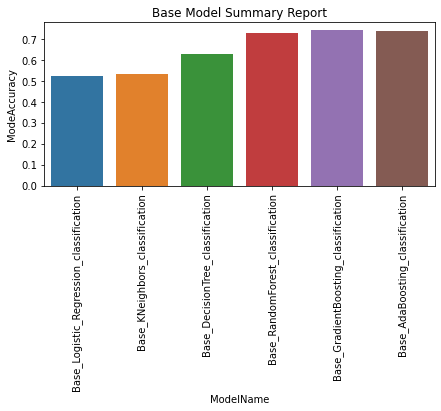

In [99]:
plt.figure(figsize=(7,3))
sns.barplot(df['ModelName'],df['ModeAccuracy'])
plt.title('Base Model Summary Report')
plt.xticks(rotation=90)
plt.show()

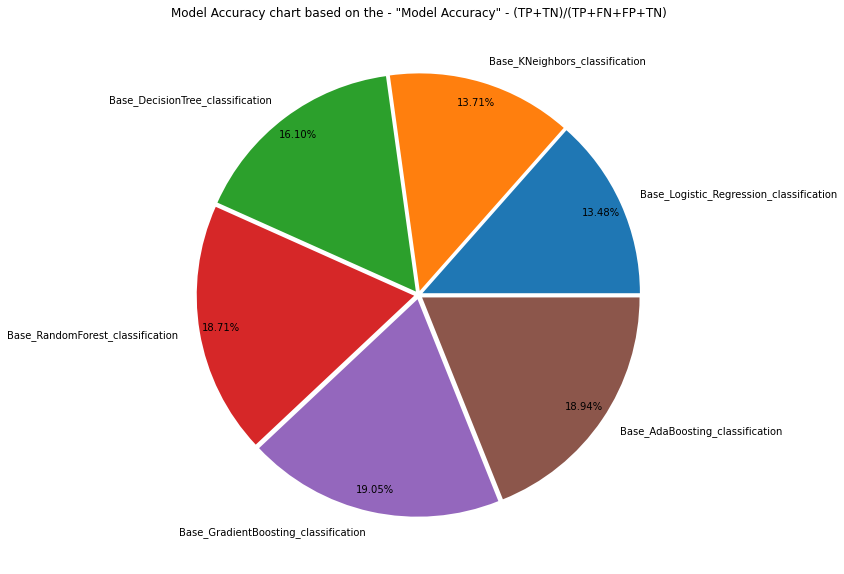

In [100]:
plt.figure(figsize=(10,10))
label = df['ModelName'].unique()
plt.pie(df['ModeAccuracy'],autopct="%.2f%%",labels=label,pctdistance=0.9,explode=[0.02]*6)
plt.title('Model Accuracy chart based on the - "Model Accuracy" - (TP+TN)/(TP+FN+FP+TN)')
plt.show()

# Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

# Hyper Parameter Tunning 
    1. Logistic Regression
    2. Support Vector Machine
    3. KNN
    4. Random Forest
    5. Gradient Boosting
    6. AdaBoosting

# Logistic Regression

Logistic Regression Model Accuracy :  52.5 %


[[748 203]
 [747 302]]


              precision    recall  f1-score   support

           0       0.50      0.79      0.61       951
           1       0.60      0.29      0.39      1049

    accuracy                           0.53      2000
   macro avg       0.55      0.54      0.50      2000
weighted avg       0.55      0.53      0.49      2000



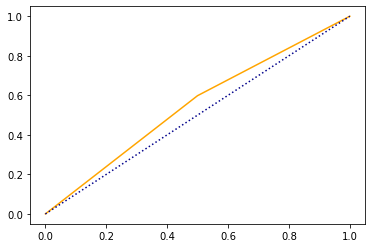

In [49]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)
y_pred = logreg.predict(X_test)
print('Logistic Regression Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print('\n')
print(confusion_matrix(y_pred,y_test))
print('\n')
print(classification_report(y_pred,y_test))

#ROC curve
from sklearn.metrics import roc_curve
fpr , tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')

## HyperParameter Tunning (Logistic Regression)
    1.penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
    2.C : float (Inverse of regularization strength : smaller values specify stronger regularization.)
    3.random_state : int
    4.solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
    5.max_iter : int (Maximum number of iterations taken for the solvers to converge.)
    6.verbose : int (For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.)
    7.n_jobs : int

In [50]:
# check Overfitting anf underfitting case
print('Overfitting check with Test case : ',logreg.score(X_train,y_train)*100,'%')
print('Overfitting check with Test Case : ',logreg.score(X_test,y_test)*100,'%')

Overfitting check with Test case :  51.37500000000001 %
Overfitting check with Test Case :  52.5 %


In [60]:
#HyprModelSummary
HyprModelSummary = {}
T = 0

In [61]:
X_train

,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_0,...,Reco_Insurance_Type_1,Health Indicator_0,Health Indicator_1,Health Indicator_2,Health Indicator_3,Health Indicator_4,Health Indicator_5,Health Indicator_6,Health Indicator_7,Health Indicator_8
3821,31,3533,28,28,0,13,4.0,1,7440.0,0,...,0,1,0,0,0,0,0,0,0,0
6136,0,1426,51,51,0,9,3.0,12,13530.0,1,...,0,0,0,1,0,0,0,0,0,0
8161,8,420,29,29,0,6,3.0,1,8704.0,0,...,0,1,0,0,0,0,0,0,0,0
655,0,2950,75,75,0,6,3.0,22,20704.0,0,...,0,1,0,0,0,0,0,0,0,0
2950,11,137,47,41,1,0,1.0,22,22080.0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,22,1955,25,25,0,6,3.0,18,11592.0,0,...,0,1,0,0,0,0,0,0,0,0
6646,11,719,23,23,0,6,3.0,17,3684.0,0,...,0,1,0,0,0,0,0,0,0,0
5478,12,5811,22,22,0,6,3.0,1,5370.0,0,...,0,0,0,0,0,0,1,0,0,0
8548,34,3260,47,47,0,6,2.0,20,16172.0,1,...,0,0,1,0,0,0,0,0,0,0


In [62]:
#Sample Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=22)

# Labling
### Inbalance Independent Veriable : 
from imblearn.over_sampling import SMOTE
sm = SMOTE()    #SMOTE : Synthetic minority oversampling technique (inbalance Data Handling)
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

#Logistic Regression
#logreg = LogisticRegression(penalty='l1',C=0.01,solver='liblinear',max_iter=100,verbose=1)

from sklearn.model_selection import GridSearchCV
grid_params = {"C":np.logspace(-3,3,7), 
               "penalty":["l1","l2"],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}

grid_model = GridSearchCV(LogisticRegression(), grid_params, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train_smote,y_train_smote)
grid = grid_model.best_estimator_

model = grid.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)
print('Logistic Regression Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

#HyprProjectSummary
ModelName = 'HyprTunning_Logistic_Regression_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
HyprModelSummary[T] = {}
HyprModelSummary[T]['ModelName'] = ModelName
HyprModelSummary[T]['ModeAccuracy'] = Acc
HyprModelSummary[T]['Precision'] = pres
HyprModelSummary[T]['Recall'] = recal
HyprModelSummary[T]['f1score'] = f1score
T=T+1

HyprModelSummary

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Logistic Regression Model Accuracy :  75.7 %
[[1513  486]
 [   0    1]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1999
           1       0.00      1.00      0.00         1

    accuracy                           0.76      2000
   macro avg       0.50      0.88      0.43      2000
weighted avg       1.00      0.76      0.86      2000



{0: {'ModelName': 'HyprTunning_Logistic_Regression_classification',
  'ModeAccuracy': 0.757,
  'Precision': 0.002053388090349076,
  'Recall': 1.0,
  'f1score': 0.004098360655737705}}

# Feature Selection
    Feature Selection is a techinque of finding out the features that contribute the most to our model i.e. the best predictors.

# KNN classification

   Alpha  Accuracy
0      1    0.5600
1      2    0.6170
2      3    0.5370
3      4    0.5990
4      5    0.5270
5      6    0.5690
6      7    0.5155
7      8    0.5560
8      9    0.5190


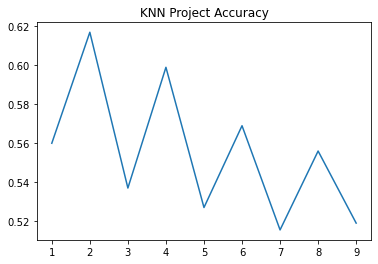

Fitting 3 folds for each of 36 candidates, totalling 108 fits
KNeighborsClassifier Model Accuracy :  53.05 %
[[861 305]
 [634 200]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1166
           1       0.40      0.24      0.30       834

    accuracy                           0.53      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.50      0.53      0.50      2000



{0: {'ModelName': 'HyprTunning_Logistic_Regression_classification',
  'ModeAccuracy': 0.757,
  'Precision': 0.002053388090349076,
  'Recall': 1.0,
  'f1score': 0.004098360655737705},
 1: {'ModelName': 'HyprTunning_KNeighborsClassifier_Model',
  'ModeAccuracy': 0.5305,
  'Precision': 0.39603960396039606,
  'Recall': 0.23980815347721823,
  'f1score': 0.2987303958177745}}

In [63]:
#Sample Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=21)

# Labling
### Inabalance Independent Veriable : 
from imblearn.over_sampling import SMOTE
sm = SMOTE()    #SMOTE : Synthetic minority oversampling technique (inbalance Data Handling)
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

from sklearn import metrics

Acc = []
alpha = []
# KNN claddsifiction
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote,y_train_smote)
    y_pred = knn.predict(X_test)
    #print('KNeighborsClassifier Model Accuracy :'+str(i)+' ---', accuracy_score(y_pred,y_test))
    alpha.append(i)
    Acc.append(accuracy_score(y_pred,y_test))

Knn_acc = pd.DataFrame()
Knn_acc['Alpha'] = alpha
Knn_acc['Accuracy'] = Acc
print(Knn_acc)

sns.lineplot(x=alpha,y=Acc)
plt.title('KNN Project Accuracy')
plt.show()

from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_model = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train_smote,y_train_smote)
grid = grid_model.best_estimator_

model = grid.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

#HyprProjectSummary
ModelName = 'HyprTunning_KNeighborsClassifier_Model'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
HyprModelSummary[T] = {}
HyprModelSummary[T]['ModelName'] = ModelName
HyprModelSummary[T]['ModeAccuracy'] = Acc
HyprModelSummary[T]['Precision'] = pres
HyprModelSummary[T]['Recall'] = recal
HyprModelSummary[T]['f1score'] = f1score
T=T+1

HyprModelSummary



# Decision Tree Hyper Parameter Tunning 

## Decision Tree Parameters
    1.criterion{“gini”, “entropy”}
    2.splitter{“best”, “random”}
    3.max_depth : int
    4.min_samples_split : int
    5.min_samples_leaf : int 
    6.min_weight_fraction_leaf : float
    7.max_features : int, float or {“auto”, “sqrt”, “log2”}
    8.random_state : int
    9.max_leaf_nodes : int

    Alpha     Acc
0       1  0.4655
1       2  0.5410
2       3  0.7475
3       4  0.5890
4       5  0.6485
5       6  0.6990
6       7  0.7190
7       8  0.7355
8       9  0.7340
9      10  0.7030
10     11  0.7125
11     12  0.6900
12     13  0.6810
13     14  0.6915
14     15  0.6885
15     16  0.6780
16     17  0.6500
17     18  0.6715
18     19  0.6370


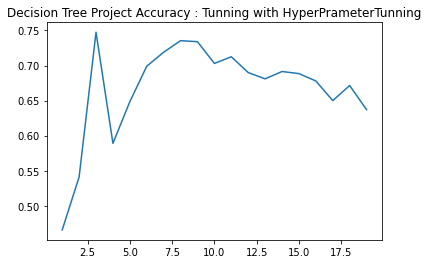

In [64]:
#Decision Tree classifiction
alpha = []
Acc = []
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth=i,criterion='entropy',splitter='random')
    dt.fit(X_train_smote,y_train_smote)
    y_pred = dt.predict(X_test)
    #print('DecisionTreeClassifier Model Accuracy : ', accuracy_score(y_pred,y_test))
    alpha.append(i)
    Acc.append(accuracy_score(y_pred,y_test))

DT = pd.DataFrame()
DT['Alpha'] = alpha
DT['Acc'] = Acc
print(DT)
sns.lineplot(x=alpha,y=Acc)
plt.title('Decision Tree Project Accuracy : Tunning with HyperPrameterTunning')
plt.show()

In [67]:
# Decision Tree Using GridSearch CV
model = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

parameter = {'criterion': ['gini','entropy'],
            'max_depth' : [2,3,5,10,20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            }

grid_model = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train_smote,y_train_smote)
grid = grid_model.best_estimator_

model = grid.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

#HyprProjectSummary
ModelName = 'HyprTunning_DecisionTreeClassifier_Model'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
HyprModelSummary[T] = {}
HyprModelSummary[T]['ModelName'] = ModelName
HyprModelSummary[T]['ModeAccuracy'] = Acc
HyprModelSummary[T]['Precision'] = pres
HyprModelSummary[T]['Recall'] = recal
HyprModelSummary[T]['f1score'] = f1score
T=T+1

HyprModelSummary



Fitting 3 folds for each of 50 candidates, totalling 150 fits
KNeighborsClassifier Model Accuracy :  71.25 %
[[1383  463]
 [ 112   42]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1846
           1       0.08      0.27      0.13       154

    accuracy                           0.71      2000
   macro avg       0.50      0.51      0.48      2000
weighted avg       0.86      0.71      0.77      2000



{0: {'ModelName': 'HyprTunning_Logistic_Regression_classification',
  'ModeAccuracy': 0.757,
  'Precision': 0.002053388090349076,
  'Recall': 1.0,
  'f1score': 0.004098360655737705},
 1: {'ModelName': 'HyprTunning_KNeighborsClassifier_Model',
  'ModeAccuracy': 0.5305,
  'Precision': 0.39603960396039606,
  'Recall': 0.23980815347721823,
  'f1score': 0.2987303958177745},
 2: {'ModelName': 'HyprTunning_DecisionTreeClassifier_Model',
  'ModeAccuracy': 0.7125,
  'Precision': 0.08316831683168317,
  'Recall': 0.2727272727272727,
  'f1score': 0.1274658573596358}}

## Random Forest HyperParameter Tunning
    Most important hyperparameters of Random Forest:

    1.n_estimators = n of trees
    2.max_features = max number of features considered for splitting a node
    3.max_depth = max number of levels in each decision tree
    4.min_samples_split = min number of data points placed in a node before the node is split
    5.min_samples_leaf = min number of data points allowed in a leaf node
    6.bootstrap = method for sampling data points (with or without replacement)

In [73]:
#Random Forest claddsifiction
rnd = RandomForestClassifier(n_estimators=2)
rnd.fit(X_train_smote,y_train_smote)
y_pred = rnd.predict(X_test)
print('RandomForestClassifier Model Accuracy : ', accuracy_score(y_pred,y_test))

RandomForestClassifier Model Accuracy :  0.696


In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [2,4,6], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]
grid_model = GridSearchCV(RandomForestClassifier(), param_grid=parameter, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train_smote,y_train_smote)
grid = grid_model.best_estimator_

model = grid.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)
print('RandomForestClassifier Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

#HyprProjectSummary
ModelName = 'HyprTunning_RandomForestClassifier_Model'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
HyprModelSummary[T] = {}
HyprModelSummary[T]['ModelName'] = ModelName
HyprModelSummary[T]['ModeAccuracy'] = Acc
HyprModelSummary[T]['Precision'] = pres
HyprModelSummary[T]['Recall'] = recal
HyprModelSummary[T]['f1score'] = f1score
T=T+1

HyprModelSummary


Fitting 3 folds for each of 50 candidates, totalling 150 fits
RandomForestClassifier Model Accuracy :  73.4 %
[[1444  481]
 [  51   24]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.84      1925
           1       0.05      0.32      0.08        75

    accuracy                           0.73      2000
   macro avg       0.51      0.54      0.46      2000
weighted avg       0.93      0.73      0.82      2000



{0: {'ModelName': 'HyprTunning_Logistic_Regression_classification',
  'ModeAccuracy': 0.757,
  'Precision': 0.002053388090349076,
  'Recall': 1.0,
  'f1score': 0.004098360655737705},
 1: {'ModelName': 'HyprTunning_KNeighborsClassifier_Model',
  'ModeAccuracy': 0.5305,
  'Precision': 0.39603960396039606,
  'Recall': 0.23980815347721823,
  'f1score': 0.2987303958177745},
 2: {'ModelName': 'HyprTunning_DecisionTreeClassifier_Model',
  'ModeAccuracy': 0.7125,
  'Precision': 0.08316831683168317,
  'Recall': 0.2727272727272727,
  'f1score': 0.1274658573596358},
 3: {'ModelName': 'HyprTunning_RandomForestClassifier_Model',
  'ModeAccuracy': 0.734,
  'Precision': 0.047524752475247525,
  'Recall': 0.32,
  'f1score': 0.08275862068965519}}

## Gradient Boosting: HyprParameter Boosting

# Used HyprParameter :
    1.loss{‘deviance’, ‘exponential’}
    2.learning_rate : float
    3.n_estimators : int
    4.subsample : float
    5.criterion : {‘friedman_mse’, ‘mse’, ‘mae’}
    6.min_samples_split : int
    7.min_samples_leaf : int
    8.min_weight_fraction_leaf : float
    9.min_impurity_decrease : float

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

parameter = {'loss' : ['deviance','explonential'],
            'learning_rate' : [2,4,6,8,10],
            'n_estimators' : [10,20,30],
            'min_impurity_decrease':[0.1,0.2,0.3,0.4,0.5]}

grid_model = GridSearchCV(GradientBoostingClassifier(), param_grid=parameter, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train_smote,y_train_smote)
grid = grid_model.best_estimator_

model = grid.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)
print('GradientBoostingClassifier Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

#HyprProjectSummary
ModelName = 'HyprTunning_GradientBoostingClassifier_Model'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
HyprModelSummary[T] = {}
HyprModelSummary[T]['ModelName'] = ModelName
HyprModelSummary[T]['ModeAccuracy'] = Acc
HyprModelSummary[T]['Precision'] = pres
HyprModelSummary[T]['Recall'] = recal
HyprModelSummary[T]['f1score'] = f1score
T=T+1

HyprModelSummary


Fitting 3 folds for each of 150 candidates, totalling 450 fits
GradientBoostingClassifier Model Accuracy :  70.3 %
[[1365  464]
 [ 130   41]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1829
           1       0.08      0.24      0.12       171

    accuracy                           0.70      2000
   macro avg       0.50      0.49      0.47      2000
weighted avg       0.84      0.70      0.76      2000



{0: {'ModelName': 'HyprTunning_Logistic_Regression_classification',
  'ModeAccuracy': 0.757,
  'Precision': 0.002053388090349076,
  'Recall': 1.0,
  'f1score': 0.004098360655737705},
 1: {'ModelName': 'HyprTunning_KNeighborsClassifier_Model',
  'ModeAccuracy': 0.5305,
  'Precision': 0.39603960396039606,
  'Recall': 0.23980815347721823,
  'f1score': 0.2987303958177745},
 2: {'ModelName': 'HyprTunning_DecisionTreeClassifier_Model',
  'ModeAccuracy': 0.7125,
  'Precision': 0.08316831683168317,
  'Recall': 0.2727272727272727,
  'f1score': 0.1274658573596358},
 3: {'ModelName': 'HyprTunning_RandomForestClassifier_Model',
  'ModeAccuracy': 0.734,
  'Precision': 0.047524752475247525,
  'Recall': 0.32,
  'f1score': 0.08275862068965519},
 4: {'ModelName': 'HyprTunning_GradientBoostingClassifier_Model',
  'ModeAccuracy': 0.703,
  'Precision': 0.08118811881188119,
  'Recall': 0.23976608187134502,
  'f1score': 0.121301775147929}}

# AdaBoosting Parameter 

In [83]:
#Ada Boosting claddsifiction Best on the Decision Tree Boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


#Parameter for the Decision Tree
parameter = {'criterion': ['gini','entropy'],
            'max_depth' : [2,3,5,10,20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            }
grid_model = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train_smote,y_train_smote)
grid = grid_model.best_estimator_

#AdaBoosting With DecisionTree Classifier
ABO = AdaBoostClassifier(n_estimators=50,base_estimator=grid,learning_rate=1, random_state=0)

Adaboos = ABO.fit(X_train_smote,y_train_smote)
y_pred = Adaboos.predict(X_test)
print('AdaBoostClassifier Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))


#HyprProjectSummary
ModelName = 'HyprTunning_AdaBoostClassifier_Model'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
HyprModelSummary[T] = {}
HyprModelSummary[T]['ModelName'] = ModelName
HyprModelSummary[T]['ModeAccuracy'] = Acc
HyprModelSummary[T]['Precision'] = pres
HyprModelSummary[T]['Recall'] = recal
HyprModelSummary[T]['f1score'] = f1score
T=T+1

HyprModelSummary



Fitting 3 folds for each of 50 candidates, totalling 150 fits
AdaBoostClassifier Model Accuracy :  66.8 %
[[1229  398]
 [ 266  107]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1627
           1       0.21      0.29      0.24       373

    accuracy                           0.67      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.71      0.67      0.69      2000



{0: {'ModelName': 'HyprTunning_Logistic_Regression_classification',
  'ModeAccuracy': 0.757,
  'Precision': 0.002053388090349076,
  'Recall': 1.0,
  'f1score': 0.004098360655737705},
 1: {'ModelName': 'HyprTunning_KNeighborsClassifier_Model',
  'ModeAccuracy': 0.5305,
  'Precision': 0.39603960396039606,
  'Recall': 0.23980815347721823,
  'f1score': 0.2987303958177745},
 2: {'ModelName': 'HyprTunning_DecisionTreeClassifier_Model',
  'ModeAccuracy': 0.7125,
  'Precision': 0.08316831683168317,
  'Recall': 0.2727272727272727,
  'f1score': 0.1274658573596358},
 3: {'ModelName': 'HyprTunning_RandomForestClassifier_Model',
  'ModeAccuracy': 0.734,
  'Precision': 0.047524752475247525,
  'Recall': 0.32,
  'f1score': 0.08275862068965519},
 4: {'ModelName': 'HyprTunning_GradientBoostingClassifier_Model',
  'ModeAccuracy': 0.703,
  'Precision': 0.08118811881188119,
  'Recall': 0.23976608187134502,
  'f1score': 0.121301775147929},
 5: {'ModelName': 'HyprTunning_AdaBoostClassifier_Model',
  'ModeAcc

In [84]:
HyprModelSummary

{0: {'ModelName': 'HyprTunning_Logistic_Regression_classification',
  'ModeAccuracy': 0.757,
  'Precision': 0.002053388090349076,
  'Recall': 1.0,
  'f1score': 0.004098360655737705},
 1: {'ModelName': 'HyprTunning_KNeighborsClassifier_Model',
  'ModeAccuracy': 0.5305,
  'Precision': 0.39603960396039606,
  'Recall': 0.23980815347721823,
  'f1score': 0.2987303958177745},
 2: {'ModelName': 'HyprTunning_DecisionTreeClassifier_Model',
  'ModeAccuracy': 0.7125,
  'Precision': 0.08316831683168317,
  'Recall': 0.2727272727272727,
  'f1score': 0.1274658573596358},
 3: {'ModelName': 'HyprTunning_RandomForestClassifier_Model',
  'ModeAccuracy': 0.734,
  'Precision': 0.047524752475247525,
  'Recall': 0.32,
  'f1score': 0.08275862068965519},
 4: {'ModelName': 'HyprTunning_GradientBoostingClassifier_Model',
  'ModeAccuracy': 0.703,
  'Precision': 0.08118811881188119,
  'Recall': 0.23976608187134502,
  'f1score': 0.121301775147929},
 5: {'ModelName': 'HyprTunning_AdaBoostClassifier_Model',
  'ModeAcc

In [101]:
ModelName,ModeAccuracy,Precision,Recall,f1score = [],[],[],[],[]
import json
sorted_json_data = json.dumps(HyprModelSummary, sort_keys=True)
finalJson = json.loads(sorted_json_data)
finalJson
for i in range(len(finalJson)):
    List = finalJson[str(i)]
    ModelName.append(List['ModelName'])
    ModeAccuracy.append(List['ModeAccuracy'])
    Precision.append(List['Precision'])
    Recall.append(List['Recall'])
    f1score.append(List['f1score'])
df1 = pd.DataFrame()
df1['ModelName'] = ModelName
df1['ModeAccuracy'] = ModeAccuracy
df1['Precision'] = Precision
df1['Recall'] = Recall
df1['f1score'] = f1score

df1

,ModelName,ModeAccuracy,Precision,Recall,f1score
0,HyprTunning_Logistic_Regression_classification,0.7570,0.002053,1.000000,0.004098
1,HyprTunning_KNeighborsClassifier_Model,0.5305,0.396040,0.239808,0.298730
2,HyprTunning_DecisionTreeClassifier_Model,0.7125,0.083168,0.272727,0.127466
3,HyprTunning_RandomForestClassifier_Model,0.7340,0.047525,0.320000,0.082759
4,HyprTunning_GradientBoostingClassifier_Model,0.7030,0.081188,0.239766,0.121302
5,HyprTunning_AdaBoostClassifier_Model,0.6680,0.211881,0.286863,0.243736


In [103]:
# Higher Accurate Base Model is : 
df1.sort_values('ModeAccuracy',ascending=False).head(1)

,ModelName,ModeAccuracy,Precision,Recall,f1score
0,HyprTunning_Logistic_Regression_classification,0.757,0.002053,1.0,0.004098


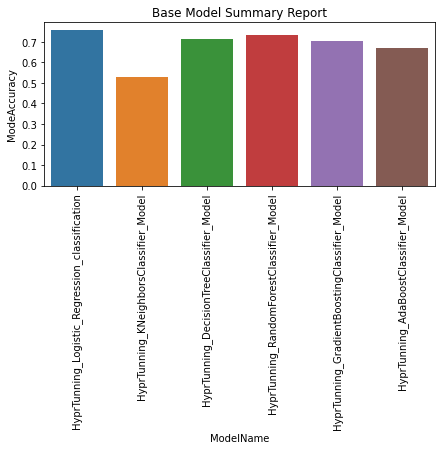

In [104]:
plt.figure(figsize=(7,3))
sns.barplot(df1['ModelName'],df1['ModeAccuracy'])
plt.title('Base Model Summary Report')
plt.xticks(rotation=90)
plt.show()

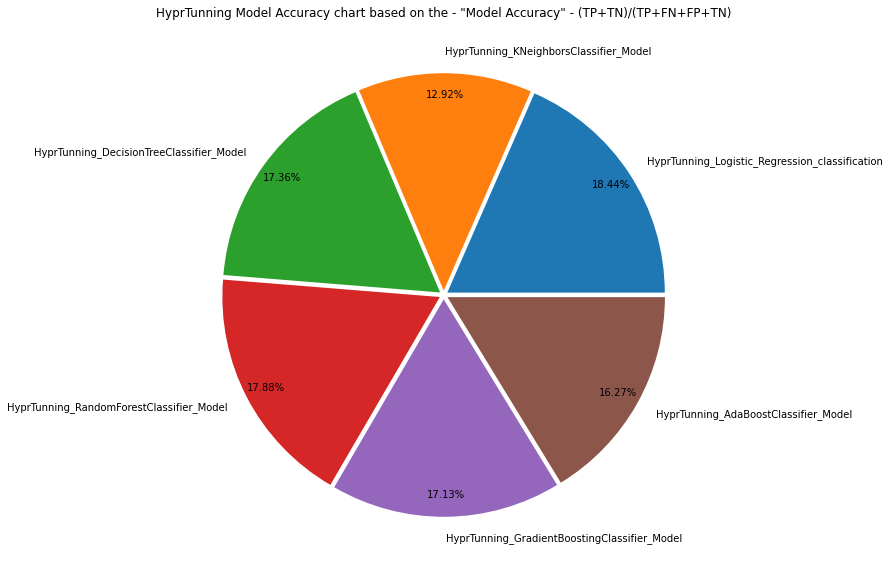

In [106]:
plt.figure(figsize=(10,10))
label = df1['ModelName'].unique()
plt.pie(df1['ModeAccuracy'],autopct="%.2f%%",labels=label,pctdistance=0.9,explode=[0.02]*6)
plt.title('HyprTunning Model Accuracy chart based on the - "Model Accuracy" - (TP+TN)/(TP+FN+FP+TN)')
plt.show()

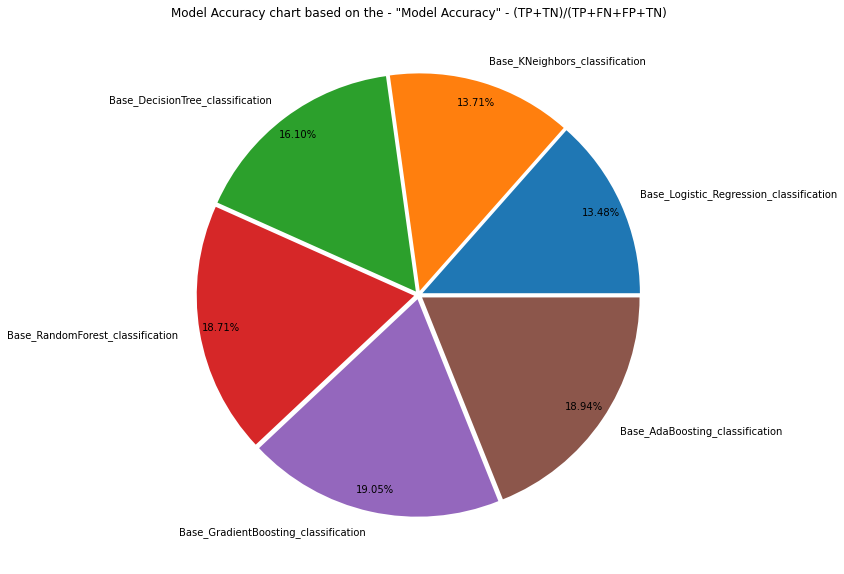

In [107]:
plt.figure(figsize=(10,10))
label = df['ModelName'].unique()
plt.pie(df['ModeAccuracy'],autopct="%.2f%%",labels=label,pctdistance=0.9,explode=[0.02]*6)
plt.title('Model Accuracy chart based on the - "Model Accuracy" - (TP+TN)/(TP+FN+FP+TN)')
plt.show()